In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('heart.csv') 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.duplicated().sum()

723

In [9]:
hd = df.drop_duplicates()
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [11]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

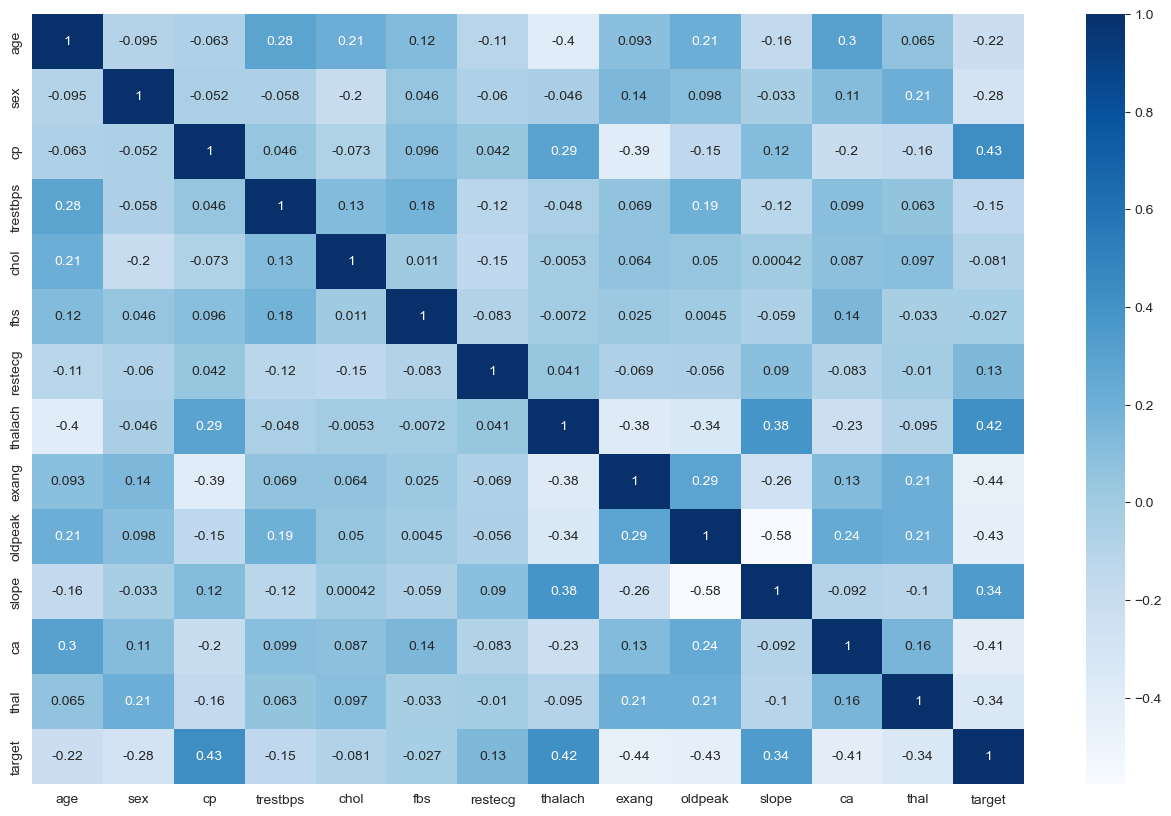

In [12]:
plt.figure(figsize = (16,10))
sns.heatmap(hd.corr(), annot= True, cmap = 'Blues')

In [13]:
hd.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [16]:
for c in hd.columns:
    print(f"{c} : {hd[c].nunique()} "  )

age : 41 
sex : 2 
cp : 4 
trestbps : 49 
chol : 152 
fbs : 2 
restecg : 3 
thalach : 91 
exang : 2 
oldpeak : 40 
slope : 3 
ca : 5 
thal : 4 
target : 2 


In [24]:
categorias = ['sex' , 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

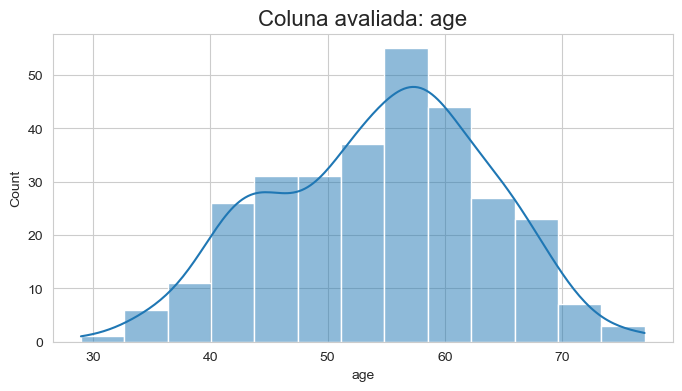

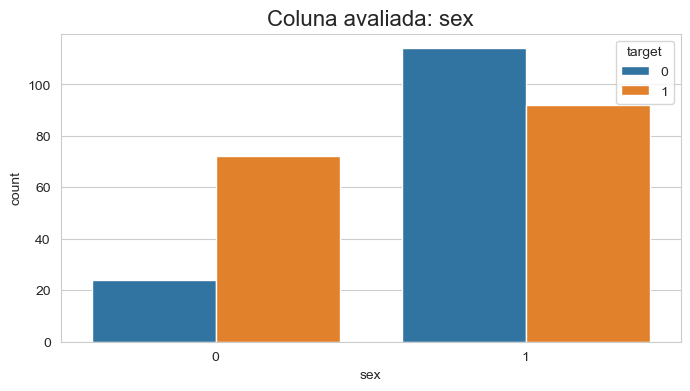

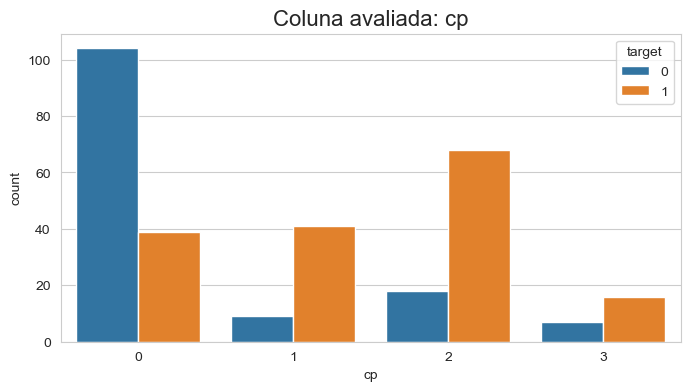

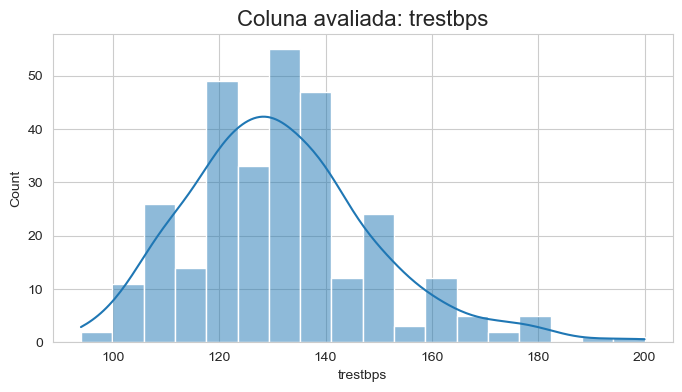

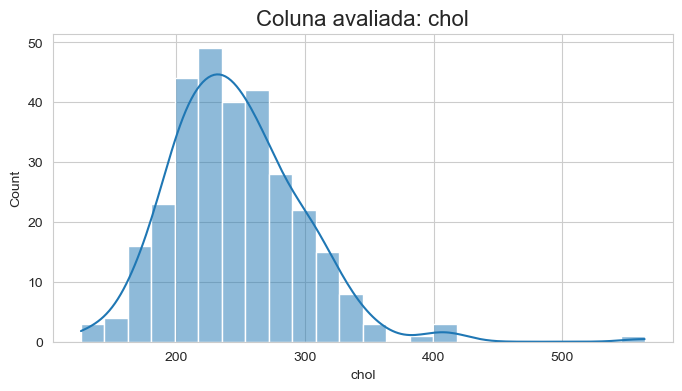

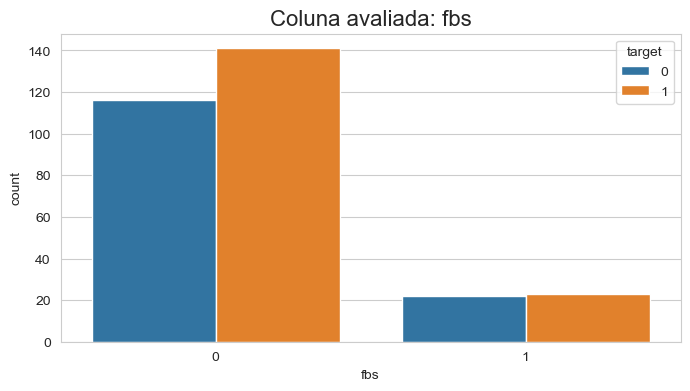

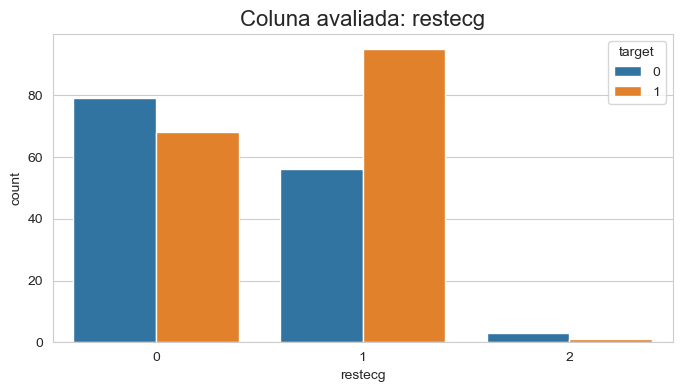

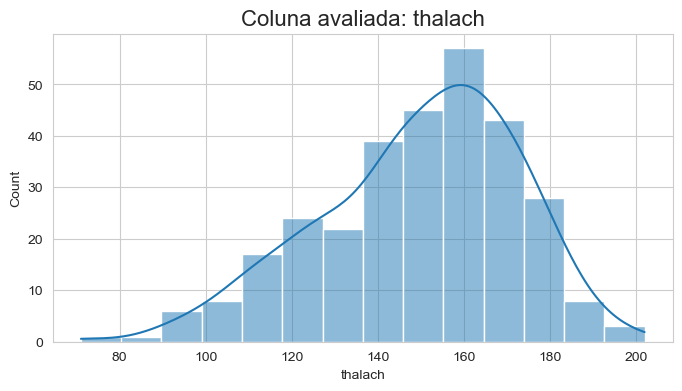

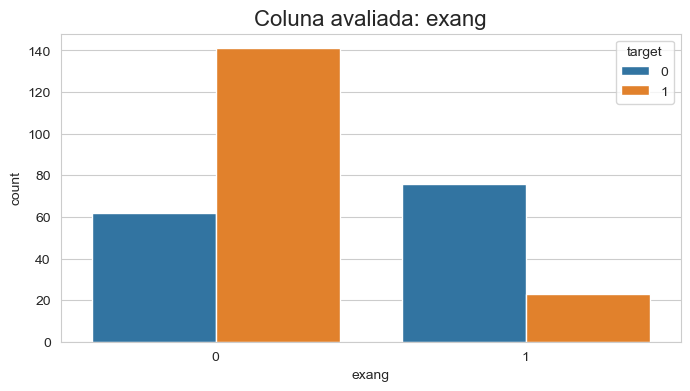

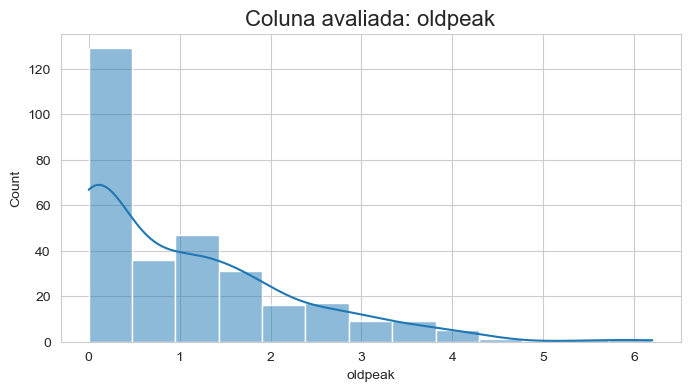

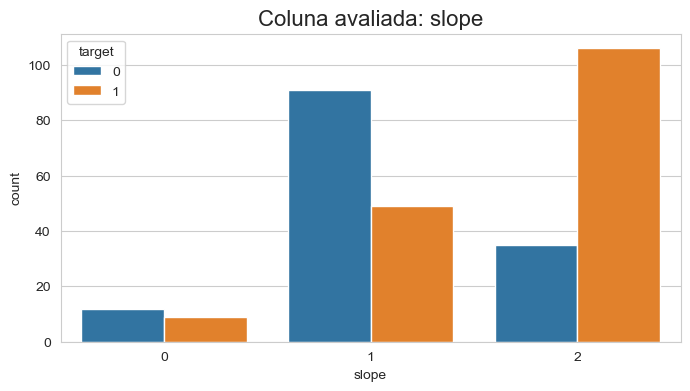

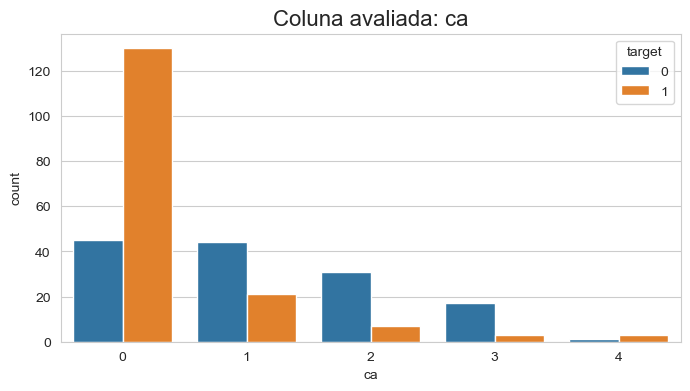

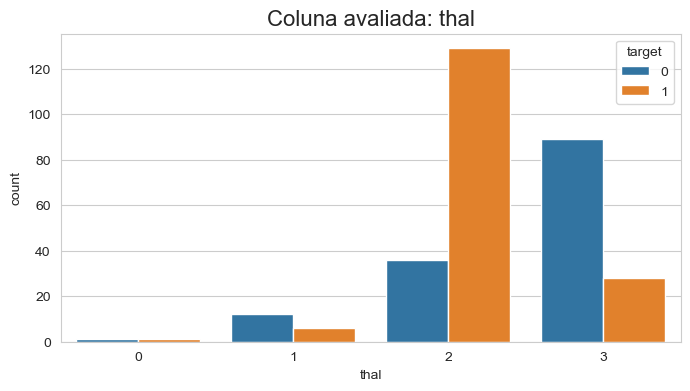

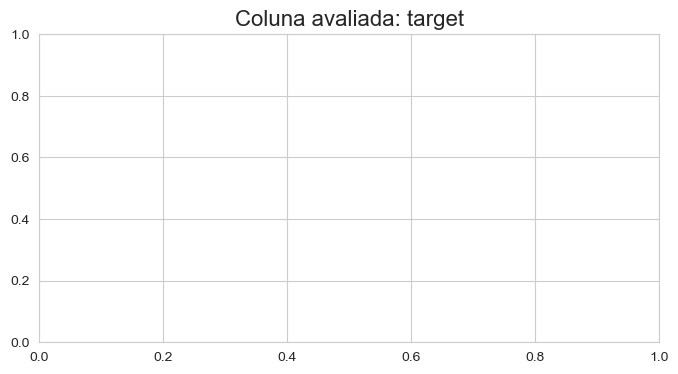

In [28]:
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    if c in categorias:
        sns.countplot(x=hd[c], hue=hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)

#REMOVENDO OUTLIERS

<Axes: >

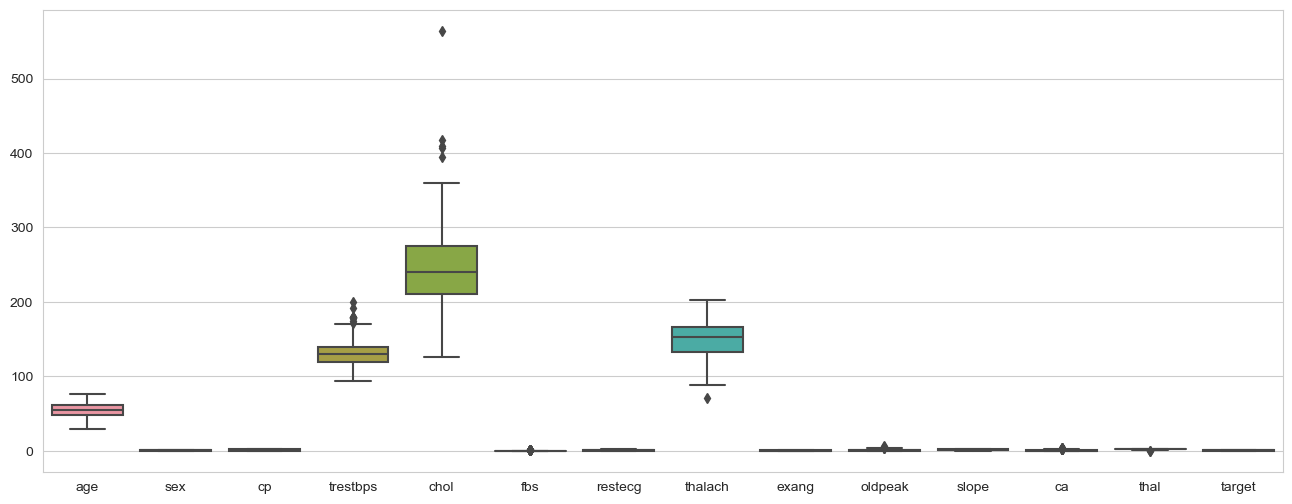

In [30]:
plt.figure(figsize = (16,6))
sns.boxplot(data=hd)

In [31]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
hd['trestbps'].quantile(0.99)

180.0

In [33]:
hd1 = hd[hd['trestbps'] <hd['trestbps'].quantile(0.99) ]

<Axes: >

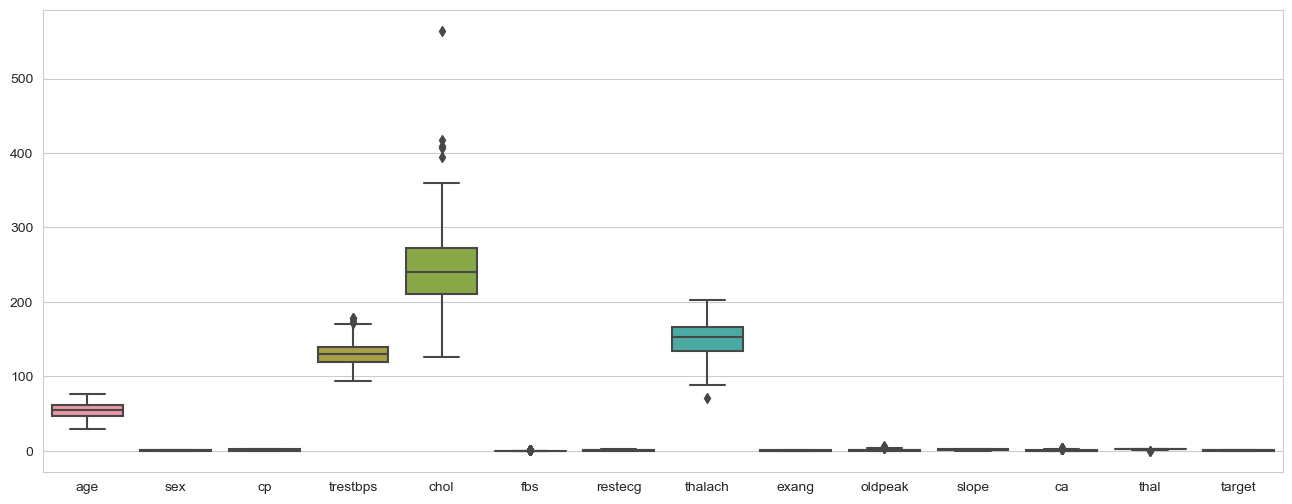

In [34]:
plt.figure(figsize = (16,6))
sns.boxplot(data=hd1)

In [35]:
hd1['chol'].quantile(0.98)

354.4799999999999

In [36]:
hd1 = hd1[hd1['chol'] <hd1['chol'].quantile(0.98) ]

<Axes: >

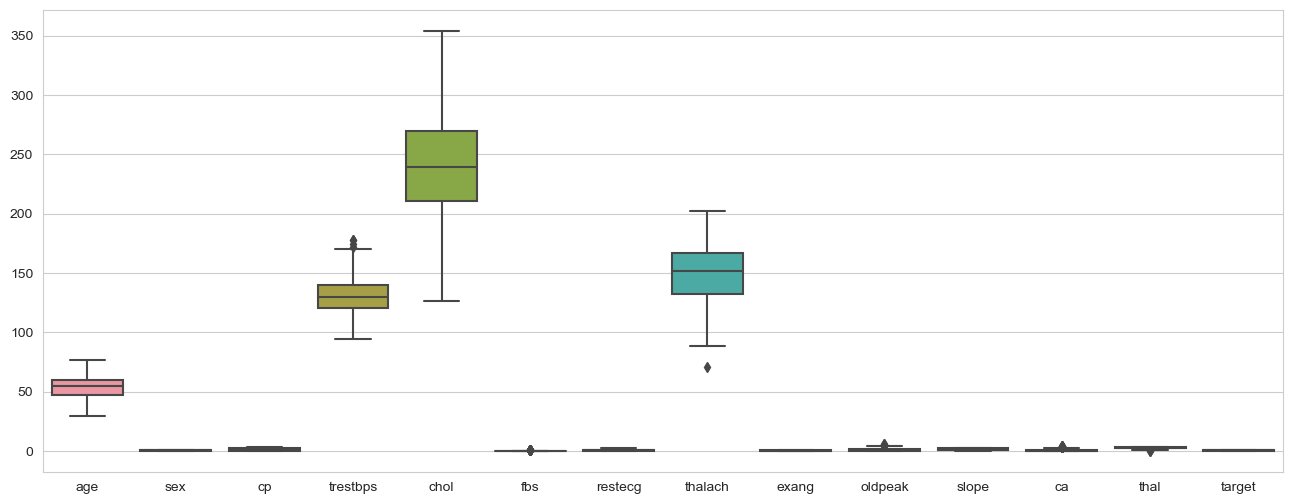

In [37]:
plt.figure(figsize = (16,6))
sns.boxplot(data=hd1)

In [39]:
hd1['thalach'].quantile(0.005)

88.9

In [43]:
hd3 = hd1[hd1['thalach'] > hd1['thalach'].quantile(0.005)]

<Axes: >

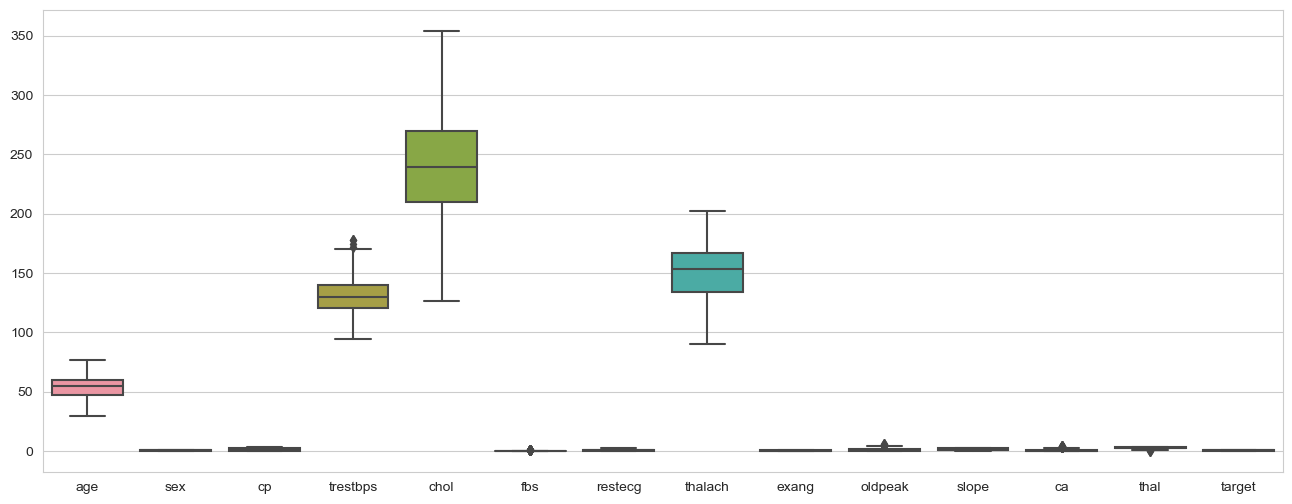

In [44]:
plt.figure(figsize = (16,6))
sns.boxplot(data=hd3)

In [45]:
hd3.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.103806,0.698962,0.975779,130.453287,241.813149,0.145329,0.532872,149.941176,0.321799,1.015571,1.404844,0.716263,2.304498,0.550173
std,9.062454,0.459505,1.035533,16.137174,44.326594,0.353043,0.520209,22.378685,0.467977,1.147279,0.616985,1.008185,0.615777,0.498339
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
categorias = ['sex' , 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [47]:
hd4 = pd.get_dummies(hd3, columns = ['sex' , 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [50]:
X = hd4.drop('target', axis = 1)
y = hd4['target'] 

In [51]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
log = LogisticRegression(max_iter=10000)

In [58]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [59]:
log.score(X_train, y_train)

0.8744588744588745

In [60]:
log.score(X_test, y_test)

0.8448275862068966

In [62]:
y_previsto = log.predict(X_test)
y_previsto

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [63]:
accuracy_score(y_test, y_previsto)

0.8448275862068966

In [64]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [65]:
confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]], dtype=int64)

In [101]:
def relatorio_ml(df, algoritmo, opt ):
        X = df.drop('target', axis = 1)
        y = df['target'] 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        if opt == 0:
            ml = algoritmo(max_iter = 10000)
        elif opt ==1:
            ml = algoritmo(n_estimators = 10000)
        elif opt ==2:
            ml = algoritmo()
        ml.fit(X_train, y_train)
        score_train = ml.score(X_train, y_train)
        print(f"Acurácia treino: {score_train * 100:.2f}%")
        score_test = ml.score(X_test, y_test)
        print(f"Acurácia teste: {score_test * 100:.2f}%")
        
        y_previsto = log.predict(X_test)
        print("--CLASSIFICATION REPORT---")
        print(classification_report(y_test, y_previsto))
        print("--CONFUSION MATRIZ --")
        confusao = confusion_matrix(y_test, y_previsto)
        sns.heatmap(confusao, annot = True, cmap = 'Blues')
        
        return score_train, score_test
        

Acurácia treino: 87.45%
Acurácia teste: 84.48%
--CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--CONFUSION MATRIZ --


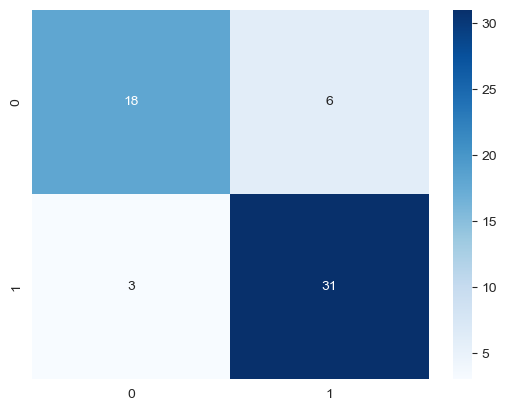

In [84]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt=0)

Acurácia treino: 100.00%
Acurácia teste: 68.97%
--CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--CONFUSION MATRIZ --


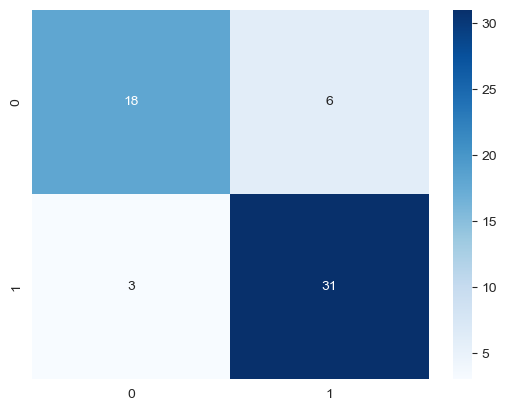

In [93]:
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier, opt=2)

Acurácia treino: 93.51%
Acurácia teste: 82.76%
--CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--CONFUSION MATRIZ --


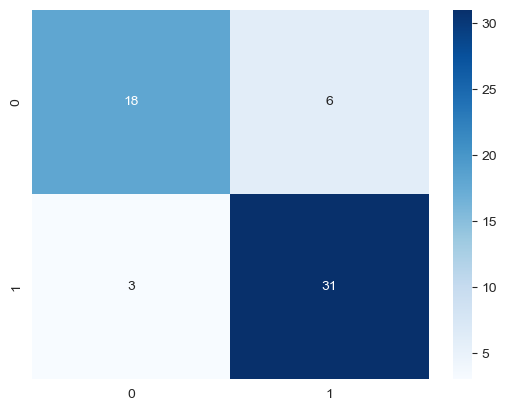

In [95]:
ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier, opt=2)

rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier, 1)

Acurácia treino: 100.00%
Acurácia teste: 82.76%
--CLASSIFICATION REPORT---
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58

--CONFUSION MATRIZ --


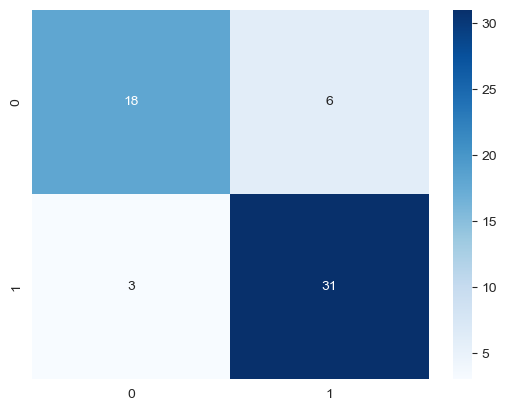

In [125]:
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier,  opt= 2)

In [127]:
print("hello world")

hello world


In [133]:
data = { 'Models': ['Logistic Regression', 'Decision Tree', 
                     'Random Forest Classifier', 'Ada Boost'], 
         'Acurácia Treino':[round (log_train * 100, 2), 
                            round(tree_train *100, 2), round (rand_train * 100, 2), round (ada_train * 100, 2)],  
         'Acurácia Teste': [round (log_test * 100, 2), 
                           round(tree_test * 100, 2), 
                         
                           round(rand_test * 100, 2), 
                           round(ada_test * 100, 2)], 
       }
df = pd.DataFrame(data)
df.sort_values (by= 'Acurácia Teste',  ascending=False, inplace=True)
df

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,87.45,84.48
2,Random Forest Classifier,100.00,82.76
3,Ada Boost,93.51,82.76
1,Decision Tree,100.00,68.97
